In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", "Data")
df_schema = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df_schema.drop(index = np.arange(6), inplace=True)
df_schema.reset_index(drop=True, inplace=True)
df_schema.drop(columns = ["Unnamed: 0"], inplace=True)
df_schema.rename(columns = {"Unnamed: 1": "Variable", "Unnamed: 2": "Meaning"}, inplace=True)
df_schema

,Variable,Meaning
0,ID,Customer ID
1,Age,Customer's age in completed years
2,Experience,#years of professional experience
3,Income,Annual income of the customer ($000)
4,ZIPCode,Home Address ZIP code.
5,Family,Family size of the customer
6,CCAvg,Avg. spending on credit cards per month ($000)
7,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...
8,Mortgage,Value of house mortgage if any. ($000)
9,Personal Loan,Did this customer accept the personal loan off...


# From the above table we can say that ID is not worth analysing, hence we put it as our index 

In [6]:
df.set_index(df.ID, inplace = True)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,
1,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


# Checking NULL Values

In [9]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Checking for any less density extreme outliers

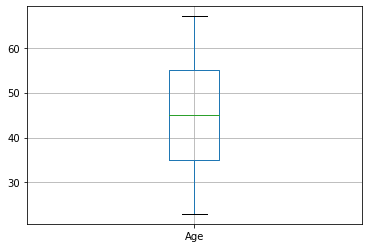

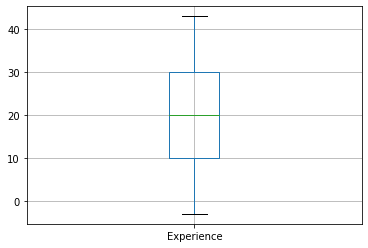

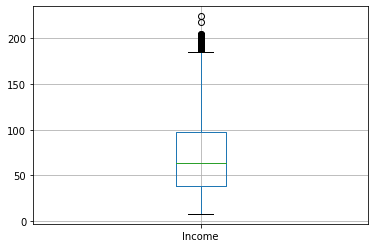

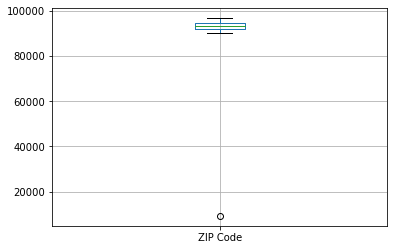

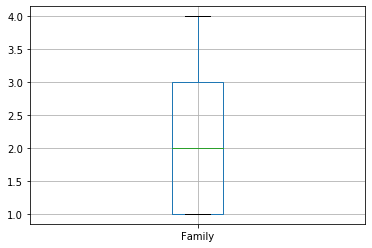

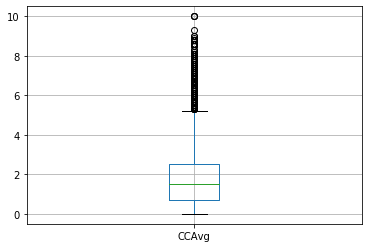

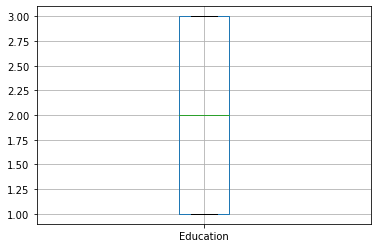

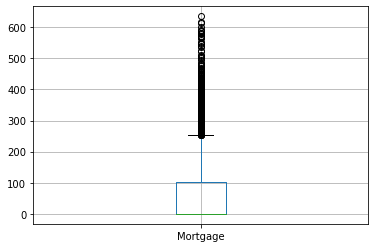

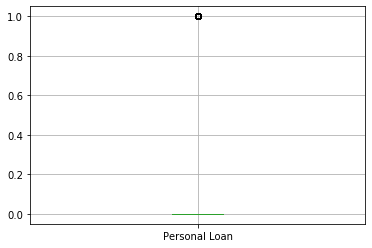

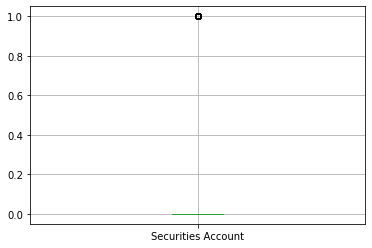

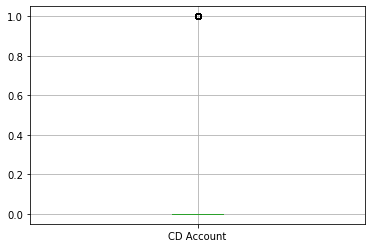

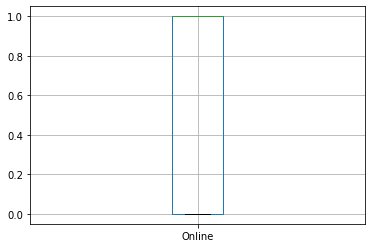

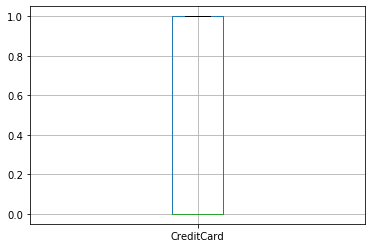

In [12]:
features = df.columns[1:]
for column in features:
    df.boxplot([column])
    plt.show()

# Though Zip code has an extreme low density outlier, it isn't an unusual value, hence we keep it

# Splitting independent and dependent variables

In [16]:
y = df[['Personal Loan']]
X = df[list(set(df.columns) - set(y.columns))]

# Now checking which feature significantly affects the dependent variable

In [17]:
X1 = sm.add_constant(X)
Logistic = sm.Logit(y, X1)
result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128331
         Iterations 9


In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4986
Method:                           MLE   Df Model:                           13
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.5942
Time:                        06:30:24   Log-Likelihood:                -641.65
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.7179      4.115     -2.847      0.004     -19.784      -3.652
Securities Account    -0.9453      0.286     -3.305      0.001      -1.506      -0.385
Experience             0.0639      0.061      1.048      0.295      -0.056       0.183
ID                  -5.23e-05   5.14e-05     -1.017      0.309      -0.000    4.85e-05
CD Account             3.8232      0.324     11.791      0.000       3.188       4.459
Age                   -0.0538      0.061     -0.877      0.380      -0.174       0.066
CCAvg                  0.1218      0.040      3.070      0.002       0.044       0.200
Family                 0.6952      0.074      9.353      0.000       0.549       0.841
Mortgage               0.0005      0.001      0.836      0.403      -0.001       0.002
ZIP Code           -3.743e-06   4.07e-05     -0.092      0.927   -8.35e-05    7.61e-05
Online                -0.6717      0.157     -4.272      0.000      -0.980      -0.364
CreditCard            -1.1136      0.205     -5.430      0.000      -1.516      -0.712
Education              1.7404      0.115     15.098      0.000       1.514       1.966
Income                 0.0547      0.003     20.820      0.000       0.050       0.060
======================================================================================
"""

# From the above table we can say that the following variables significantly affect the dependent variable

<ul>
    <li>Securities Account</li>
    <li>CD Account</li>
    <li>CCAvg</li>
    <li>Family</li>
    <li>Online</li>
    <li>CreditCard</li>
    <li>Education</li>
    <li>Income</li>
</ul>

# Out of which the following greatly affect the dependent variable

<ul>
    <li>CD Account</li>
    <li>Family</li>
    <li>Online</li>
    <li>CreditCard</li>
    <li>Education</li>
    <li>Income</li>
</ul>